In [6]:
import matplotlib.pyplot as plt

In [34]:
log_path = 'exp/baseline_204b_res18/logs/0408_120330/info.log'
with open(log_path,'r') as f:
    log = f.read().split('\n')

In [35]:
log[1].split()

['2022-04-08',
 '12:11:55,629',
 '-',
 'trainer',
 '-',
 'INFO',
 '-',
 'epoch:',
 '1',
 'lr:',
 '0.01',
 'train_loss:',
 '3.5368',
 'train_accuracy:',
 '0.2384',
 'valid_loss:',
 '2.5816',
 'valid_accuracy:',
 '0.4012']

In [36]:
log = [line for line in log if 'epoch:' in line]
train_loss, train_acc, val_loss, val_acc = [], [], [], []
for line in log:
    infos = line.split()
    train_loss.append(float(infos[12]))
    train_acc.append(float(infos[14]))
    val_loss.append(float(infos[16]))
    val_acc.append(float(infos[18]))
print('max train acc: %.4f'%(max(train_acc)))
print('max devel acc: %.4f'%(max(val_acc)))

max train acc: 0.9548
max devel acc: 0.7520


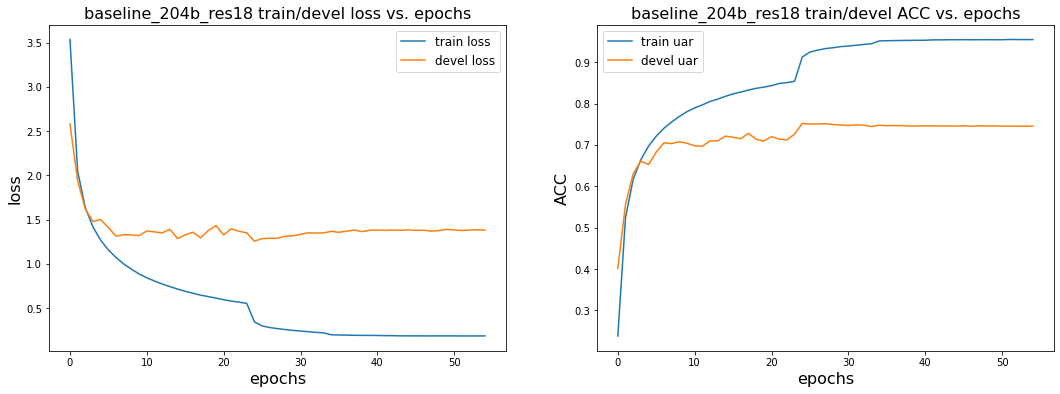

In [29]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.plot(train_loss, label="train loss")
plt.plot(val_loss, label="devel loss")
plt.xlabel('epochs', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.title('%s train/devel loss vs. epochs'%log_path.split('/')[-4], fontsize=16)
plt.legend(fontsize=12);

plt.subplot(122)
plt.plot(train_acc, label="train uar")
plt.plot(val_acc, label="devel uar")
plt.xlabel('epochs', fontsize=16)
plt.ylabel('ACC', fontsize=16)
plt.title('%s train/devel ACC vs. epochs'%log_path.split('/')[-4], fontsize=16)
plt.legend(fontsize=12);
plt.savefig('%s.png'%log_path.split('/')[-4], dpi=100)

## BAD datasets stats

In [42]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# load dataset
tips = sns.load_dataset("tips")

# Set the figure size
plt.figure(figsize=(8, 8))

# grouped barplot
sns.barplot(x="day", y="total_bill", hue="smoker", data=tips, ci=None);

AttributeError: 'list' object has no attribute 'get'

<Figure size 576x576 with 0 Axes>

## spectrogram aumentations

In [24]:
import matplotlib.pyplot as plot
import soundfile as sf
import seaborn as sns
from dataset import freq_mask, time_mask

Text(0.5, 1.0, 'log')

<Figure size 1008x1008 with 0 Axes>

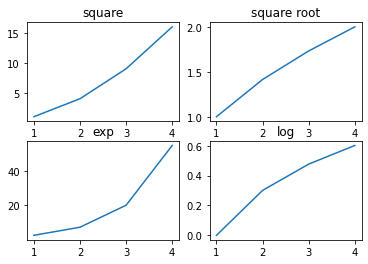

In [64]:
plot.figure(figsize=(14, 14))
fig,a =  plot.subplots(2,2)
import numpy as np
x = np.arange(1,5)
a[0][0].plot(x,x*x)
a[0][0].set_title('square')
a[0][1].plot(x,np.sqrt(x))
a[0][1].set_title('square root')
a[1][0].plot(x,np.exp(x))
a[1][0].set_title('exp')
a[1][1].plot(x,np.log10(x))
a[1][1].set_title('log')

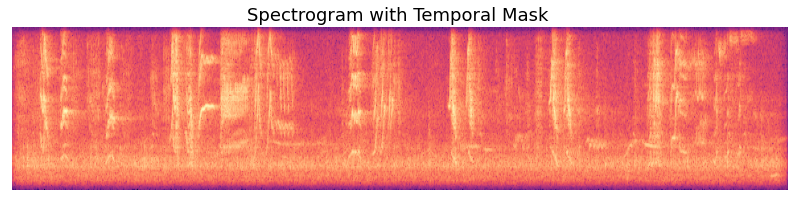

In [101]:
# Read the wav file (mono)

# wav_path = '/DATA1/ziang/data/sw/3h-aligned/Fieldfare/505644.wav'
wav_path = '/DATA1/ziang/data/sw/3h-aligned/Fieldfare/543166.wav'

y,sr = sf.read(wav_path)
plot.figure(figsize=(14, 3))

# plot.subplot(211)
plot.title('Spectrogram with Temporal Mask', fontsize=18)
# plot.plot(y)
# plot.xlabel('Sample')
# plot.ylabel('Amplitude')
# plot.axis('off')


# plot.subplot(212)
plot.specgram(y,Fs=sr, cmap="magma")
plot.xlabel('Time')
plot.ylabel('Frequency')
plot.axis('off')
plot.savefig('visualization/spec_time.png',dpi=150)
plot.show()

# plot.subplot(221)
# plot.specgram(y,Fs=sr, cmap="magma")
# plot.xlabel('Time')
# plot.ylabel('Frequency')
# plot.axis('off')
# # plot.show()

# plot.subplot(222)
# plot.specgram(y,Fs=sr, cmap="magma")
# plot.xlabel('Time')
# plot.ylabel('Frequency')
# plot.axis('off')
# plot.show()

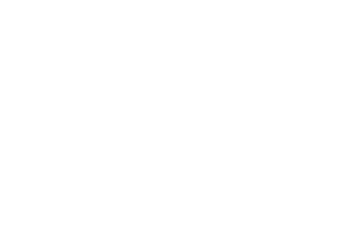

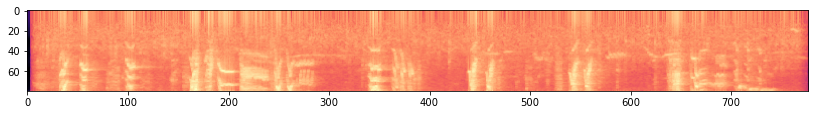

In [74]:
# Read the wav file (mono)
import h5py
import numpy as np

feat_path = '/DATA1/ziang/data/sw/3h-feats/Fieldfare/543166.h5'
hf = h5py.File(feat_path, 'r')
logfbankFeat = np.array(hf.get('logfbank'))
hf.close()
feat_to_plot = logfbankFeat.T.reshape(1,80,-1)
plot.axis('off')
plot.figure(figsize=(14, 14))
plot.imshow(feat_to_plot[0], cmap="magma")
# plot.show()


# plot.figure(figsize=(14, 14))
# plot.subplot(211)
# plot.title('Spectrogram of a wav file with piano music')
# plot.plot(y)
# plot.xlabel('Sample')
# plot.ylabel('Amplitude')
# plot.axis('off')


# plot.subplot(212)
# plot.specgram(y,Fs=sr, cmap="magma")
# plot.xlabel('Time')
# plot.ylabel('Frequency')
# plot.axis('off')
# plot.show()

In [105]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)

# metrics.plot_roc_curve(clf, X_test, y_test) 

# plt.show()

SVC(random_state=0)

In [107]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_test)

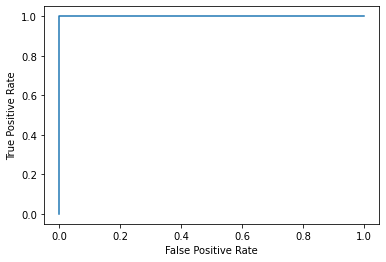

In [108]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [117]:
bad_file = '../BAD/index/all_utt2wav'
with open(bad_file,'r') as f:
    select_bad_files = [line for line in f.read().split('\n') if line]

In [237]:
import random
eval_files = random.choices(select_bad_files, k=4200)

In [242]:
utt2wav_dict = {line.split()[0]:line.split()[1] for line in select_bad_files}

In [252]:
with open('../BAD/test_utts.txt','r') as f:
    eval_files = [line+' '+utt2wav_dict[line] for line in f.read().split() if line]

KeyError: '28500_cb'

In [119]:
with open('../BAD/index/all_utt2label','r') as f:
    all_labels = [line for line in f.read().split('\n') if line]
    labels_dict = {line.split()[0]:line.split()[1] for line in all_labels}

In [130]:
label2int = {"0":0,"1":1}

In [121]:
mdl_bad_kwargs = {
    "channels": 16, 
    "block": "BasicBlock", 
    "num_blocks": [2,2,2,2], 
    "embd_dim": 1024, 
    "drop": 0.3, 
    "n_class": 2
}

In [131]:
import torch
import h5py
from tqdm import tqdm
from scipy.special import softmax
from python_speech_features import logfbank

from module.model import Gvector

In [122]:
class SVExtractor():
    def __init__(self, mdl_kwargs, model_path, device):
        self.model = self.load_model(mdl_kwargs, model_path, device)
        self.model.eval()
        self.device = device
        self.model = self.model.to(self.device)

    def load_model(self, mdl_kwargs, model_path, device):
        model = Gvector(**mdl_kwargs)
        state_dict = torch.load(model_path, map_location=device)
        if 'model' in state_dict.keys():
            state_dict = state_dict['model']
        model.load_state_dict(state_dict)
        return model

    def __call__(self, frame_feats):
        feat = torch.from_numpy(frame_feats).unsqueeze(0)
        feat = feat.float().to(self.device)
        with torch.no_grad():
            embd = self.model(feat)
        embd = embd.squeeze(0).cpu().numpy()
        return embd

In [246]:
bad_extractor = SVExtractor(mdl_bad_kwargs, '../BAD/exp/bad_aug_0.33_max_auc/chkpt/chkpt_best.pth', device="cuda:0")
bad_extractor2 = SVExtractor(mdl_bad_kwargs, '../BAD/exp/bad_baseline/chkpt/chkpt_best.pth', device="cuda:0")


In [247]:
ground_truth = []
predict = []
for eval_bird in tqdm(eval_files):
    utt, feat_file = eval_bird.split()
    ground_truth.append(label2int[labels_dict[utt]])
    hf = h5py.File(feat_file, 'r')
    feats = np.array(hf.get('logfbank'))
    hf.close()
    has_bird = softmax(bad_extractor(feats))[1]
    predict.append(has_bird)

100%|██████████| 3649/3649 [00:17<00:00, 202.88it/s]


In [248]:
ground_truth_2 = []
predict_2 = []
for eval_bird in tqdm(eval_files):
    utt, feat_file = eval_bird.split()
    ground_truth_2.append(label2int[labels_dict[utt]])
    hf = h5py.File(feat_file, 'r')
    feats = np.array(hf.get('logfbank'))
    hf.close()
    has_bird = softmax(bad_extractor2(feats))[1]
    predict_2.append(has_bird)

100%|██████████| 3649/3649 [00:17<00:00, 208.98it/s]


In [249]:
fpr, tpr, _ = metrics.roc_curve(ground_truth, predict)

In [250]:
fpr2, tpr2, _ = metrics.roc_curve(ground_truth_2, predict_2)

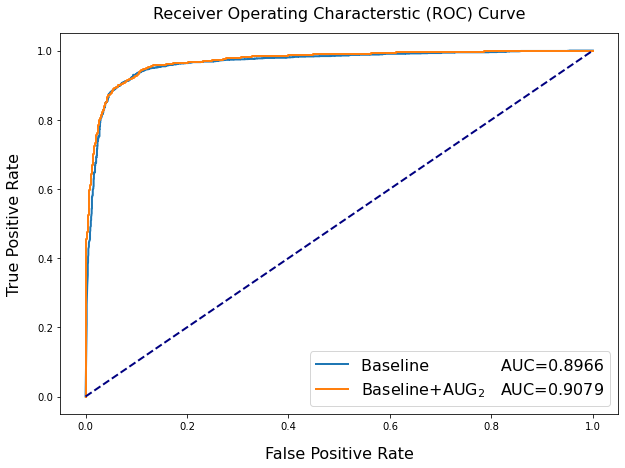

In [255]:
#create ROC curve
plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characterstic (ROC) Curve',fontsize=16,pad=15)
plt.plot(fpr,tpr, lw=2,label="Baseline              AUC=0.8966", alpha=1)
plt.plot(fpr2,tpr2, lw=2,label="Baseline+AUG$_2$   AUC=0.9079", alpha=1)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.ylabel('True Positive Rate',fontsize=16, labelpad=15)
plt.xlabel('False Positive Rate',fontsize=16, labelpad=15)
plt.legend(fontsize=16)
plt.savefig('visualization/ROC_AUC.png',dpi=150)
plt.show()

## plot BAD training

In [436]:
info_file = 'exp/120b_sceloss/logs/0416_220614/info-combine.log'

In [437]:
with open(info_file,'r') as f:
    all_lines = [line for line in f.read().split('\n') if 'train_loss' in line]

In [438]:
for i,ele in enumerate(all_lines[0].split()):
    print(i,ele)

0 2022-04-16
1 22:19:07,577
2 -
3 trainer
4 -
5 INFO
6 -
7 epoch:
8 1
9 lr:
10 0.01
11 train_loss:
12 14.5666
13 train_acc:
14 0.4450
15 valid_loss:
16 9.2878
17 valid_acc:
18 0.6463


In [439]:
train_loss, train_acc, valid_loss, valid_acc = [],[],[],[]

In [440]:
epochs     = list(range(1,len(all_lines)+1))
train_loss = [float(line.split()[12]) for line in all_lines]
train_acc  = [float(line.split()[14]) for line in all_lines]
valid_loss = [float(line.split()[16]) for line in all_lines]
valid_acc  = [float(line.split()[18]) for line in all_lines]
lrs        = [float(line.split()[10]) for line in all_lines]
# combined_loss = sorted(train_loss + valid_loss)
# combined_acc = train_acc + valid_acc
# y_ticks1 = np.linspace(min(combined_acc), max(combined_acc), 10)
# y_ticks2 = np.linspace(min(combined_loss), max(combined_loss), 10)

In [441]:
max(valid_acc)

0.7997

In [405]:
epochs     = list(range(1,len(all_lines)+1))
train_loss = [float(line.split()[12]) for line in all_lines]
train_acc  = [float(line.split()[14]) for line in all_lines]
valid_loss = [float(line.split()[18]) for line in all_lines]
valid_acc  = [float(line.split()[20]) for line in all_lines]
lrs        = [float(line.split()[10]) for line in all_lines]
# combined_loss = sorted(train_loss + valid_loss)
# combined_acc = train_acc + valid_acc
# y_ticks1 = np.linspace(min(combined_acc), max(combined_acc), 10)
# y_ticks2 = np.linspace(min(combined_loss), max(combined_loss), 10)

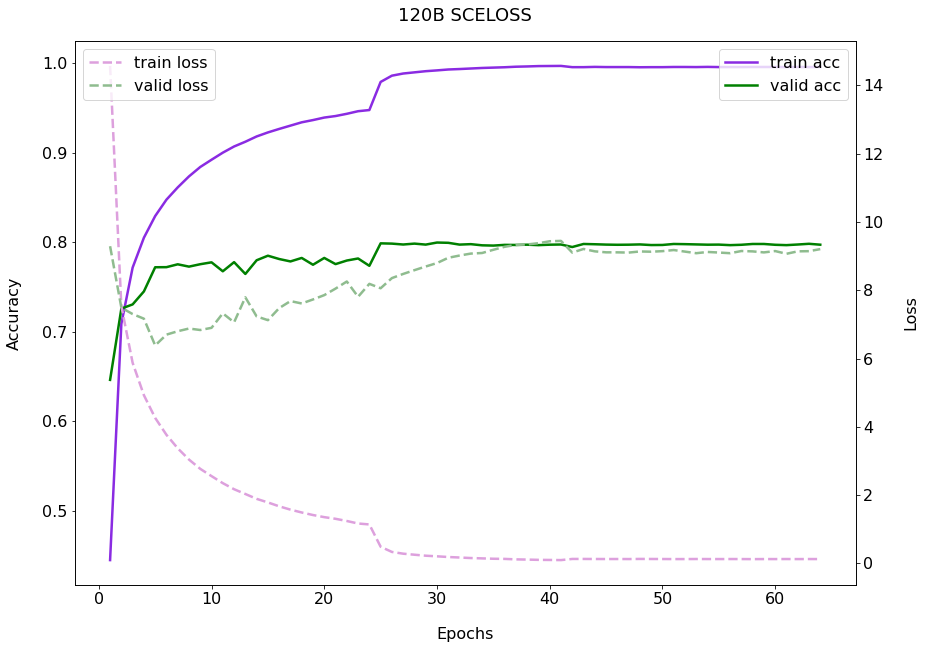

In [445]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14,10))

plt.title(info_file.split('/')[1].replace('_',' ').upper(), fontsize=18, pad=20)

ax2 = ax1.twinx()
ax1.plot(epochs, train_acc, 'blueviolet', lw=2.5, label="train acc")
ax1.plot(epochs, valid_acc, 'green', lw=2.5, label="valid acc")
ax2.plot(epochs, train_loss, 'plum', lw=2.5, label="train loss", linestyle="--")
ax2.plot(epochs, valid_loss, 'darkseagreen', lw=2.5, label="valid loss", linestyle="--")
# ax1.plot(epochs, lrs, 'darkgray', lw=2.5, label="learning rate", linestyle="-.")

ax1.set_xlabel('Epochs', fontsize=16, labelpad=20)
ax1.set_ylabel('Accuracy', fontsize=16, labelpad=20)
ax2.set_ylabel('Loss', fontsize=16, labelpad=20)
ax1.legend(fontsize=16,loc=1)
ax2.legend(fontsize=16,loc=2)

for label in ax1.get_xticklabels():
    label.set_fontproperties({"size":16})
    
for label in ax1.get_yticklabels():
    label.set_fontproperties({"size":16})
        
for label in ax2.get_yticklabels():
    label.set_fontproperties({"size":16})

plt.savefig('visualization/120b_sceloss.png', dpi=150)
plt.show()

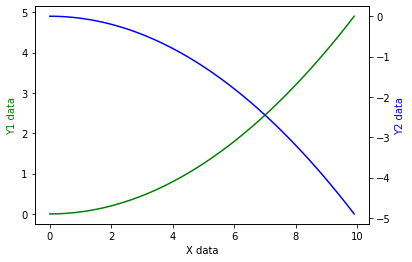

In [256]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()

## Convergence Comparison

In [446]:
info_file_1 = 'exp/baseline_821b_res18/logs/0414_145747/info.log'
info_file_2 = 'exp/821_sceloss/logs/0416_210953/info.log'

In [447]:
with open(info_file_1,'r') as f:
    all_line1 = [line for line in f.read().split('\n') if 'train_loss' in line]
with open(info_file_2,'r') as f:
    all_line2 = [line for line in f.read().split('\n') if 'train_loss' in line]

In [463]:
for i,ele in enumerate(all_line2[0].split()):
    print(i,ele)

0 2022-04-16
1 21:24:35,304
2 -
3 trainer
4 -
5 INFO
6 -
7 epoch:
8 1
9 lr:
10 0.01
11 train_loss:
12 28.2732
13 train_acc:
14 0.1591
15 valid_loss:
16 24.0195
17 valid_acc:
18 0.2482


In [453]:
epochs1     = list(range(1,len(all_line1)+1))
train_loss = [float(line.split()[12]) for line in all_line1]
train_acc  = [float(line.split()[14]) for line in all_line1]
valid_loss = [float(line.split()[16]) for line in all_line1]
valid_acc  = [float(line.split()[18]) for line in all_line1]
epochs2     = list(range(1,len(all_line2)+1))
train_loss2 = [float(line.split()[12]) for line in all_line2]
train_acc2  = [float(line.split()[14]) for line in all_line2]
valid_loss2 = [float(line.split()[16]) for line in all_line2]
valid_acc2  = [float(line.split()[18]) for line in all_line2]
lrs        = [float(line.split()[10]) for line in all_line1]

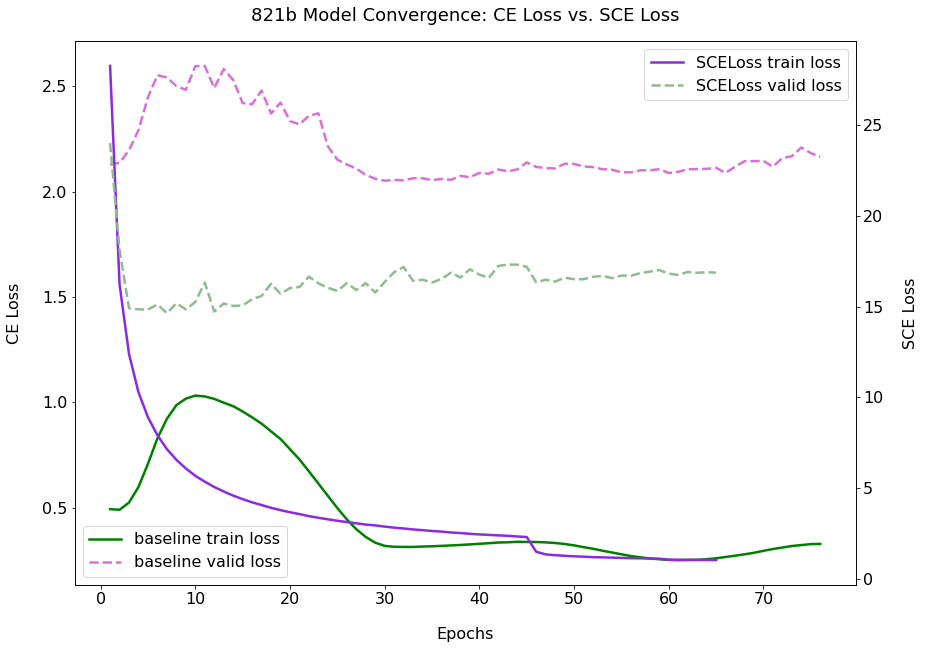

In [476]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14,10))

# plt.title(info_file.split('/')[1].replace('_',' ').upper(), fontsize=18, pad=20)
plt.title("821b Model Convergence: CE Loss vs. SCE Loss", fontsize=18, pad=20)

ax2 = ax1.twinx()
# ax1.plot(epochs1, train_acc, 'blueviolet', lw=2.5, label="train acc")
# ax1.plot(epochs1, valid_acc, 'green', lw=2.5, label="valid acc")
ax1.plot(epochs1, train_loss, 'green', lw=2.5, label="baseline train loss")
ax1.plot(epochs1, valid_loss, 'orchid', lw=2.5, label="baseline valid loss", linestyle="--")

# ax2.plot(epochs2, train_acc2, 'blueviolet', lw=2.5, label="train acc")
# ax2.plot(epochs2, valid_acc2, 'green', lw=2.5, label="valid acc")
ax2.plot(epochs2, train_loss2, 'blueviolet', lw=2.5, label="SCELoss train loss")
ax2.plot(epochs2, valid_loss2, 'darkseagreen', lw=2.5, label="SCELoss valid loss", linestyle="--")
# ax1.plot(epochs, lrs, 'darkgray', lw=2.5, label="learning rate", linestyle="-.")

ax1.set_xlabel('Epochs', fontsize=16, labelpad=20)
ax1.set_ylabel('CE Loss', fontsize=16, labelpad=20)
ax2.set_ylabel('SCE Loss', fontsize=16, labelpad=20)
ax1.legend(fontsize=16,loc=3)
ax2.legend(fontsize=16,loc=1)

for label in ax1.get_xticklabels():
    label.set_fontproperties({"size":16})
    
for label in ax1.get_yticklabels():
    label.set_fontproperties({"size":16})
        
for label in ax2.get_yticklabels():
    label.set_fontproperties({"size":16})

plt.savefig('visualization/821b_convergence_comparison.png', dpi=150)
plt.show()